In [1]:
%pylab inline
import numpy as np
from pygadgetreader import *
from octopus import density, orbit_cm


Populating the interactive namespace from numpy and matplotlib


In [18]:
font = {'size':16, 'family':'serif'}
matplotlib.rc('font', **font)

In [3]:
#ic_snap = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pos', 'dm')
#ic_vel = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'vel', 'dm')
#ic_ids = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pid', 'dm')


fc_snap = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'pos', 'dm')
fc_vel = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'vel', 'dm')
fc_ids = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'pid', 'dm')

Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs


In [4]:
def mw_particles(xyz, vxyz, ids, N_halo):
    id_cut = np.sort(ids)[N_halo]
    index_mw = np.where(ids<id_cut)[0]
    index_lmc = np.where(ids>=id_cut)[0]
    return xyz[index_mw], vxyz[index_mw], xyz[index_lmc], vxyz[index_lmc]

In [5]:
#mw_ic_pos, mw_ic_vel, lmc_ic_pos, lmc_ic_vel = mw_particles(ic_snap, ic_vel, ic_ids, 1000000)
mw_fc_pos, mw_fc_vel, lmc_fc_pos, lmc_fc_vel = mw_particles(fc_snap, fc_vel, fc_ids, 1000000)

In [6]:
#xic_cm, yic_cm, zic_cm, vx_ic_cm, vy_ic_cm, vz_ic_cm = orbit_cm.CM(mw_ic_pos, mw_ic_vel)
xfc_cm, yfc_cm, zfc_cm, vx_fc_cm, vy_fc_cm, vz_fc_cm = orbit_cm.CM(mw_fc_pos, mw_fc_vel)

#print 'ic coordinates: ', xic_cm, yic_cm, zic_cm
print 'fc coordinates: ', xfc_cm, yfc_cm, zfc_cm

fc coordinates:  3.14213492468 33.1085245965 -10.5106429199


In [7]:
# Recenter

#mw_ic_pos[:,0] = mw_ic_pos[:,0] - xic_cm
#mw_ic_pos[:,1] = mw_ic_pos[:,1] - yic_cm
#mw_ic_pos[:,2] = mw_ic_pos[:,2] - zic_cm

mw_fc_pos[:,0] = mw_fc_pos[:,0] - xfc_cm
mw_fc_pos[:,1] = mw_fc_pos[:,1] - yfc_cm
mw_fc_pos[:,2] = mw_fc_pos[:,2] - zfc_cm

fc_snap[:,0] = fc_snap[:,0] - xfc_cm
fc_snap[:,1] = fc_snap[:,1] - yfc_cm
fc_snap[:,2] = fc_snap[:,2] - zfc_cm

In [11]:
r_cuts = [25, 50, 100, 200, 400]

index1_cut_mw = np.where(np.sqrt(((mw_fc_pos[:,0])**2.0) + ((mw_fc_pos[:,1])**2.0) + ((mw_fc_pos[:,2])**2.0))<r_cuts[0])[0] 
index1_cut_all = np.where(np.sqrt(((fc_snap[:,0])**2.0) + ((fc_snap[:,1])**2.0) + ((fc_snap[:,2])**2.0))<r_cuts[0])[0] 

index2_cut_mw = np.where(np.sqrt(((mw_fc_pos[:,0])**2.0) + ((mw_fc_pos[:,1])**2.0) + ((mw_fc_pos[:,2])**2.0))<r_cuts[1])[0] 
index2_cut_all = np.where(np.sqrt(((fc_snap[:,0])**2.0) + ((fc_snap[:,1])**2.0) + ((fc_snap[:,2])**2.0))<r_cuts[1])[0] 

index3_cut_mw = np.where(np.sqrt(((mw_fc_pos[:,0])**2.0) + ((mw_fc_pos[:,1])**2.0) + ((mw_fc_pos[:,2])**2.0))<r_cuts[2])[0] 
index3_cut_all = np.where(np.sqrt(((fc_snap[:,0])**2.0) + ((fc_snap[:,1])**2.0) + ((fc_snap[:,2])**2.0))<r_cuts[2])[0] 

index4_cut_mw = np.where(np.sqrt(((mw_fc_pos[:,0])**2.0) + ((mw_fc_pos[:,1])**2.0) + ((mw_fc_pos[:,2])**2.0))<r_cuts[3])[0] 
index4_cut_all = np.where(np.sqrt(((fc_snap[:,0])**2.0) + ((fc_snap[:,1])**2.0) + ((fc_snap[:,2])**2.0))<r_cuts[3])[0] 

index5_cut_mw = np.where(np.sqrt(((mw_fc_pos[:,0])**2.0) + ((mw_fc_pos[:,1])**2.0) + ((mw_fc_pos[:,2])**2.0))<r_cuts[4])[0] 
index5_cut_all = np.where(np.sqrt(((fc_snap[:,0])**2.0) + ((fc_snap[:,1])**2.0) + ((fc_snap[:,2])**2.0))<r_cuts[4])[0] 

In [12]:
#index_cut_i = np.where(np.sqrt(((mw_ic_pos[:,0])**2.0) + ((mw_ic_pos[:,1])**2.0) + ((mw_ic_pos[:,2])**2.0))<100)[0]
index_cut_f = np.where(np.sqrt(((mw_fc_pos[:,0])**2.0) + ((mw_fc_pos[:,1])**2.0) + ((mw_fc_pos[:,2])**2.0))<40)[0]
index_cut_f_all = np.where(np.sqrt(((fc_snap[:,0])**2.0) + ((fc_snap[:,1])**2.0) + ((fc_snap[:,2])**2.0))<40)[0]


#mw_ic_pos = mw_ic_pos[index_cut_i]
mw_fc_pos1 = mw_fc_pos[index1_cut_mw]
all_fc_pos1 = fc_snap[index1_cut_all]

mw_fc_pos2 = mw_fc_pos[index2_cut_mw]
all_fc_pos2 = fc_snap[index2_cut_all]

mw_fc_pos3 = mw_fc_pos[index3_cut_mw]
all_fc_pos3 = fc_snap[index3_cut_all]

mw_fc_pos4 = mw_fc_pos[index4_cut_mw]
all_fc_pos4 = fc_snap[index4_cut_all]

mw_fc_pos5 = mw_fc_pos[index5_cut_mw]
all_fc_pos5 = fc_snap[index5_cut_all]

#mw_ic_vel = mw_ic_vel[index_cut_i]
#mw_fc_vel = mw_fc_vel[index_cut_f]

(-100, 100)

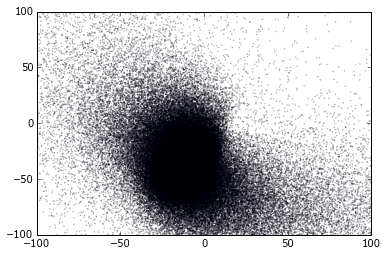

In [13]:
slides_x = np.where((lmc_fc_pos[:,0]<10) & (lmc_fc_pos[:,0]>-10))[0]
scatter(lmc_fc_pos[slides_x,1], lmc_fc_pos[slides_x,2], s=0.1, alpha=0.5)
xlim(-100, 100)
ylim(-100, 100)
#axis('equal')

In [9]:
def slicing(xyz, dr, r, direction=0):
    index_slice = np.where((xyz[:,direction]<r) & (xyz[:,direction]>r-dr))[0]
    return xyz[index_slice,0], xyz[index_slice,1], xyz[index_slice,2]

In [14]:
mw_slice_x1, mw_slice_y1, mw_slice_z1 = slicing(mw_fc_pos1, 20, 10)
all_slice_x1, all_slice_y1, all_slice_z1 = slicing(all_fc_pos1, 20, 10)

mw_slice_x2, mw_slice_y2, mw_slice_z2 = slicing(mw_fc_pos2, 20, 10)
all_slice_x2, all_slice_y2, all_slice_z2 = slicing(all_fc_pos2, 20, 10)

mw_slice_x3, mw_slice_y3, mw_slice_z3 = slicing(mw_fc_pos3, 20, 10)
all_slice_x3, all_slice_y3, all_slice_z3 = slicing(all_fc_pos3, 20, 10)

mw_slice_x4, mw_slice_y4, mw_slice_z4 = slicing(mw_fc_pos4, 20, 10)
all_slice_x4, all_slice_y4, all_slice_z4 = slicing(all_fc_pos4, 20, 10)

mw_slice_x5, mw_slice_y5, mw_slice_z5 = slicing(mw_fc_pos5, 20, 10)
all_slice_x5, all_slice_y5, all_slice_z5 = slicing(all_fc_pos5, 20, 10)


#rho_ic2 = density.grid(mw_slice_y, mw_slice_z, mw_slice_x, 100)



In [15]:
rho_ic1_mw = density.grid(mw_slice_y1, mw_slice_z1, mw_slice_x1, 100)
rho_ic1_all = density.grid(all_slice_y1, all_slice_z1, all_slice_x1, 100)

rho_ic2_mw = density.grid(mw_slice_y2, mw_slice_z2, mw_slice_x2, 100)
rho_ic2_all = density.grid(all_slice_y2, all_slice_z2, all_slice_x2, 100)

rho_ic3_mw = density.grid(mw_slice_y3, mw_slice_z3, mw_slice_x3, 100)
rho_ic3_all = density.grid(all_slice_y3, all_slice_z3, all_slice_x3, 100)

rho_ic4_mw = density.grid(mw_slice_y4, mw_slice_z4, mw_slice_x4, 100)
rho_ic4_all = density.grid(all_slice_y4, all_slice_z4, all_slice_x4, 100)

rho_ic5_mw = density.grid(mw_slice_y5, mw_slice_z5, mw_slice_x5, 100)
rho_ic5_all = density.grid(all_slice_y5, all_slice_z5, all_slice_x5, 100)


In [16]:
all_sy1 = np.linspace(min(all_slice_y1), max(all_slice_y1), 100)
all_sz1 = np.linspace(min(all_slice_z1), max(all_slice_z1), 100)

all_sy2 = np.linspace(min(all_slice_y2), max(all_slice_y2), 100)
all_sz2 = np.linspace(min(all_slice_z2), max(all_slice_z2), 100)

all_sy3 = np.linspace(min(all_slice_y3), max(all_slice_y3), 100)
all_sz3 = np.linspace(min(all_slice_z3), max(all_slice_z3), 100)

all_sy4 = np.linspace(min(all_slice_y4), max(all_slice_y4), 100)
all_sz4 = np.linspace(min(all_slice_z4), max(all_slice_z4), 100)

all_sy5 = np.linspace(min(all_slice_y5), max(all_slice_y5), 100)
all_sz5 = np.linspace(min(all_slice_z5), max(all_slice_z5), 100)


mw_sy1 = np.linspace(min(mw_slice_y1), max(mw_slice_y1), 100)
mw_sz1 = np.linspace(min(mw_slice_z1), max(mw_slice_z1), 100)

mw_sy2 = np.linspace(min(mw_slice_y2), max(mw_slice_y2), 100)
mw_sz2 = np.linspace(min(mw_slice_z2), max(mw_slice_z2), 100)

mw_sy3 = np.linspace(min(mw_slice_y3), max(mw_slice_y3), 100)
mw_sz3 = np.linspace(min(mw_slice_z3), max(mw_slice_z3), 100)

mw_sy4 = np.linspace(min(mw_slice_y4), max(mw_slice_y4), 100)
mw_sz4 = np.linspace(min(mw_slice_z4), max(mw_slice_z4), 100)

mw_sy5 = np.linspace(min(mw_slice_y5), max(mw_slice_y5), 100)
mw_sz5 = np.linspace(min(mw_slice_z5), max(mw_slice_z5), 100)

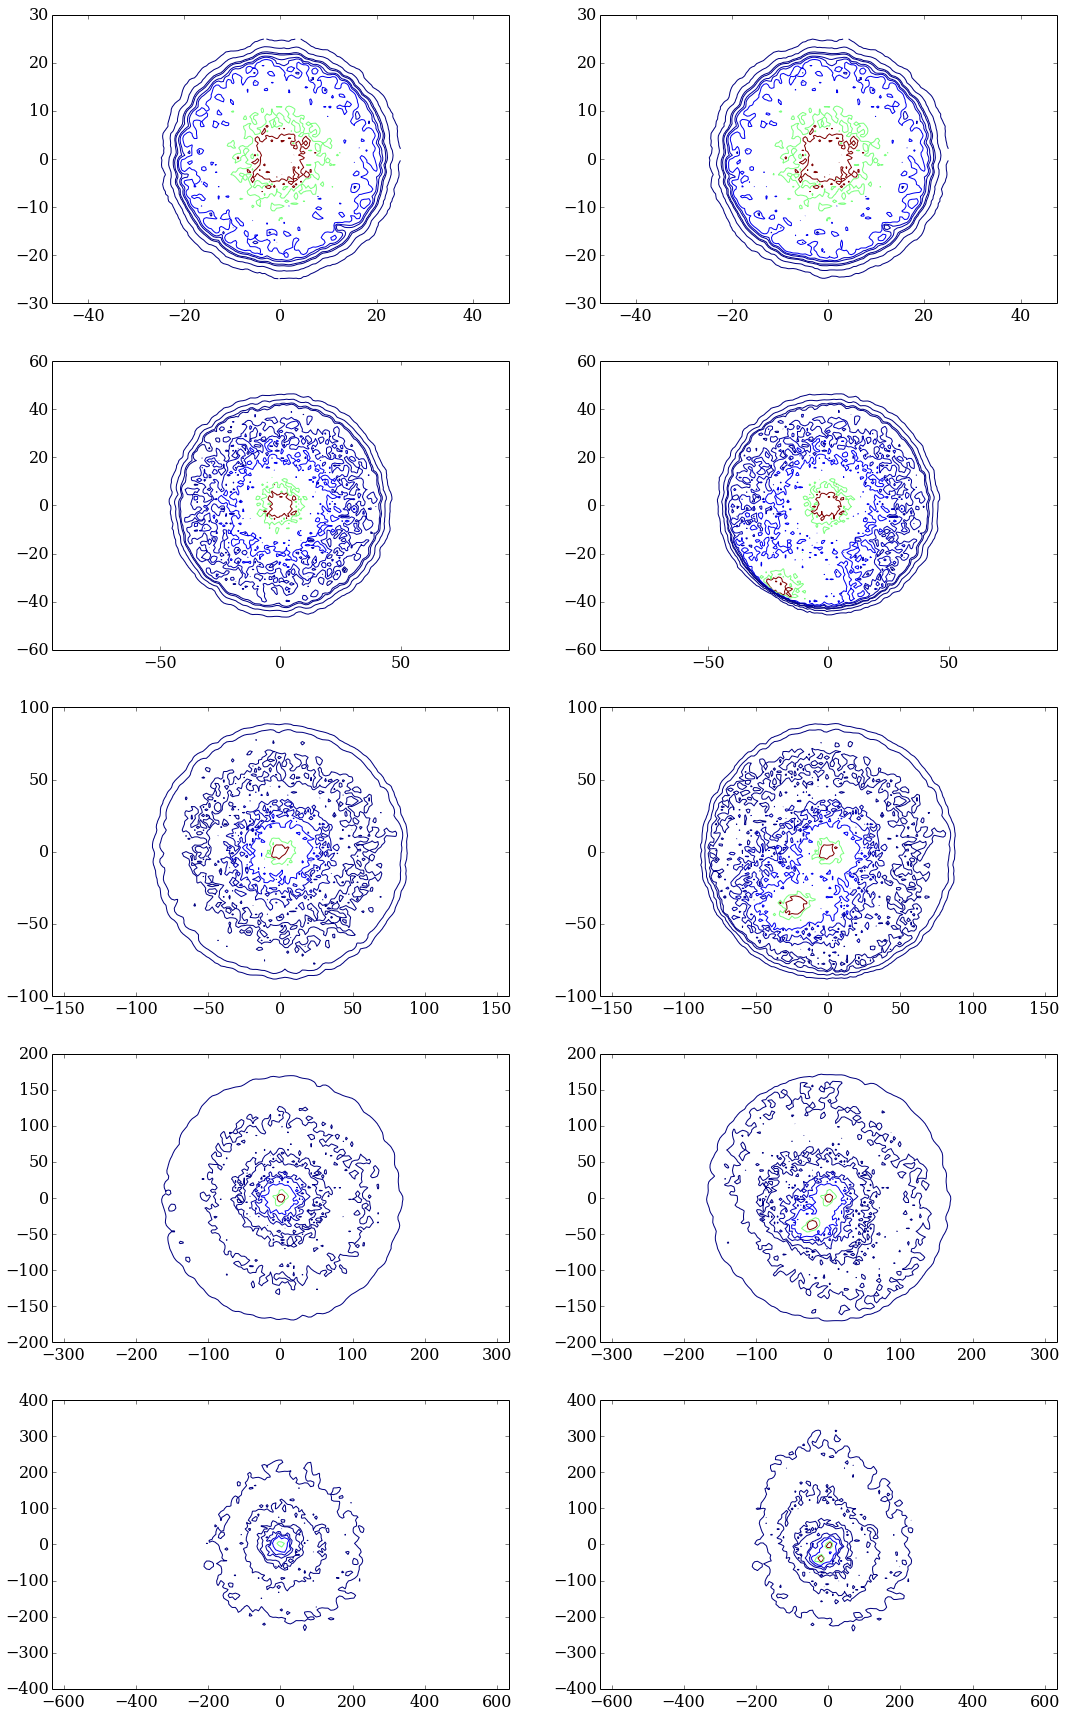

In [20]:
levels = [10, 5, 1, 0.5, 0.3, 0.1, 0.06, 0.01, 0.001]


figure(figsize=(18,30))

subplot(5, 2, 1)
contour(mw_sy1, mw_sz1, rho_ic1_mw, levels=levels)
axis('equal')

subplot(5, 2, 2)
contour(all_sy1, all_sz1, rho_ic1_all, levels=levels)
axis('equal')

subplot(5, 2, 3)
contour(mw_sy2, mw_sz2, rho_ic2_mw, levels=levels)
axis('equal')

subplot(5, 2, 4)
contour(all_sy2, all_sz2, rho_ic2_all, levels=levels)
axis('equal')

subplot(5, 2, 5)
contour(mw_sy3, mw_sz3, rho_ic3_mw, levels=levels)
axis('equal')

subplot(5, 2, 6)
contour(all_sy3, all_sz3, rho_ic3_all, levels=levels)
axis('equal')

subplot(5, 2, 7)
contour(mw_sy4, mw_sz4, rho_ic4_mw, levels=levels)
axis('equal')

subplot(5, 2, 8)
contour(all_sy4, all_sz4, rho_ic4_all, levels=levels)
axis('equal')

subplot(5, 2, 9)
contour(mw_sy5, mw_sz5, rho_ic5_mw, levels=levels)
axis('equal')

subplot(5, 2, 10)
contour(all_sy5, all_sz5, rho_ic5_all, levels=levels)
axis('equal')

savefig('MWLMCdens_contours.png', bbox_inches='tight')

In [50]:
print np.max(rho_ic), np.min(rho_ic2)

11.5595029679 4.88750393896e-10


<matplotlib.contour.QuadContourSet instance at 0x7ff188825fc8>

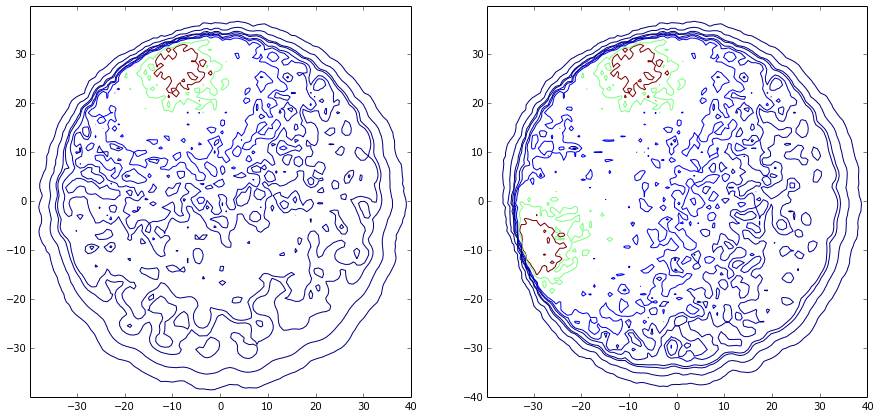

In [84]:
figure(figsize=(15,7))
subplot(1, 2, 1)
levels = [10, 5, 1, 0.5, 0.3, 0.1, 0.06, 0.01, 0.001]
contour(mw_sy, mw_sz, rho_ic2, levels=levels)

subplot(1, 2, 2)
levels = [10, 5, 1, 0.5, 0.3, 0.1, 0.06, 0.01, 0.001]
contour(all_sy, all_sz, rho_ic2_all, levels=levels)

In [21]:
mw_i_pos = readsnap('../data/MW_models/pm/MWN2vir_000.hdf5', 'pos', 'dm')
mw_f_pos = readsnap('../data/MW_models/pm/MWN2vir_020.hdf5', 'pos', 'dm')

Returning DM    Positions
Returning DM    Positions


In [22]:
index1_mw_i = np.where(np.sqrt(((mw_i_pos[:,0])**2.0) + ((mw_i_pos[:,1])**2.0) + ((mw_i_pos[:,2])**2.0))<r_cuts[0])[0] 
index1_mw_f = np.where(np.sqrt(((mw_f_pos[:,0])**2.0) + ((mw_f_pos[:,1])**2.0) + ((mw_f_pos[:,2])**2.0))<r_cuts[0])[0] 

index2_mw_i = np.where(np.sqrt(((mw_i_pos[:,0])**2.0) + ((mw_i_pos[:,1])**2.0) + ((mw_i_pos[:,2])**2.0))<r_cuts[1])[0] 
index2_mw_f = np.where(np.sqrt(((mw_f_pos[:,0])**2.0) + ((mw_f_pos[:,1])**2.0) + ((mw_f_pos[:,2])**2.0))<r_cuts[1])[0] 

index3_mw_i = np.where(np.sqrt(((mw_i_pos[:,0])**2.0) + ((mw_i_pos[:,1])**2.0) + ((mw_i_pos[:,2])**2.0))<r_cuts[2])[0] 
index3_mw_f = np.where(np.sqrt(((mw_f_pos[:,0])**2.0) + ((mw_f_pos[:,1])**2.0) + ((mw_f_pos[:,2])**2.0))<r_cuts[2])[0] 

index4_mw_i = np.where(np.sqrt(((mw_i_pos[:,0])**2.0) + ((mw_i_pos[:,1])**2.0) + ((mw_i_pos[:,2])**2.0))<r_cuts[3])[0] 
index4_mw_f = np.where(np.sqrt(((mw_f_pos[:,0])**2.0) + ((mw_f_pos[:,1])**2.0) + ((mw_f_pos[:,2])**2.0))<r_cuts[3])[0] 

index5_mw_i = np.where(np.sqrt(((mw_i_pos[:,0])**2.0) + ((mw_i_pos[:,1])**2.0) + ((mw_i_pos[:,2])**2.0))<r_cuts[4])[0] 
index5_mw_f = np.where(np.sqrt(((mw_f_pos[:,0])**2.0) + ((mw_f_pos[:,1])**2.0) + ((mw_f_pos[:,2])**2.0))<r_cuts[4])[0] 


In [23]:
mw_i_pos1 = mw_i_pos[index1_mw_i]
mw_f_pos1 = mw_f_pos[index1_mw_f]

mw_i_pos2 = mw_i_pos[index2_mw_i]
mw_f_pos2 = mw_f_pos[index2_mw_f]

mw_i_pos3 = mw_i_pos[index3_mw_i]
mw_f_pos3 = mw_f_pos[index3_mw_f]

mw_i_pos4 = mw_i_pos[index4_mw_i]
mw_f_pos4 = mw_f_pos[index4_mw_f]

mw_i_pos5 = mw_i_pos[index5_mw_i]
mw_f_pos5 = mw_f_pos[index5_mw_f]

In [24]:
mw_i_slice_x1, mw_i_slice_y1, mw_i_slice_z1 = slicing(mw_i_pos1, 20, 10)
mw_f_slice_x1, mw_f_slice_y1, mw_f_slice_z1 = slicing(mw_f_pos1, 20, 10)

mw_i_slice_x2, mw_i_slice_y2, mw_i_slice_z2 = slicing(mw_i_pos2, 20, 10)
mw_f_slice_x2, mw_f_slice_y2, mw_f_slice_z2 = slicing(mw_f_pos2, 20, 10)

mw_i_slice_x3, mw_i_slice_y3, mw_i_slice_z3 = slicing(mw_i_pos3, 20, 10)
mw_f_slice_x3, mw_f_slice_y3, mw_f_slice_z3 = slicing(mw_f_pos3, 20, 10)

mw_i_slice_x4, mw_i_slice_y4, mw_i_slice_z4 = slicing(mw_i_pos4, 20, 10)
mw_f_slice_x4, mw_f_slice_y4, mw_f_slice_z4 = slicing(mw_f_pos4, 20, 10)

mw_i_slice_x5, mw_i_slice_y5, mw_i_slice_z5 = slicing(mw_i_pos5, 20, 10)
mw_f_slice_x5, mw_f_slice_y5, mw_f_slice_z5 = slicing(mw_f_pos5, 20, 10)

In [25]:
rho_i_mw_1 = density.grid(mw_i_slice_y1, mw_i_slice_z1, mw_i_slice_x1, 100)
rho_f_mw_1 = density.grid(mw_f_slice_y1, mw_f_slice_z1, mw_f_slice_x1, 100)

rho_i_mw_2 = density.grid(mw_i_slice_y2, mw_i_slice_z2, mw_i_slice_x2, 100)
rho_f_mw_2 = density.grid(mw_f_slice_y2, mw_f_slice_z2, mw_f_slice_x2, 100)

rho_i_mw_3 = density.grid(mw_i_slice_y3, mw_i_slice_z3, mw_i_slice_x3, 100)
rho_f_mw_3 = density.grid(mw_f_slice_y3, mw_f_slice_z3, mw_f_slice_x3, 100)

rho_i_mw_4 = density.grid(mw_i_slice_y4, mw_i_slice_z4, mw_i_slice_x4, 100)
rho_f_mw_4 = density.grid(mw_f_slice_y4, mw_f_slice_z4, mw_f_slice_x4, 100)

rho_i_mw_5 = density.grid(mw_i_slice_y5, mw_i_slice_z5, mw_i_slice_x5, 100)
rho_f_mw_5 = density.grid(mw_f_slice_y5, mw_f_slice_z5, mw_f_slice_x5, 100)

In [26]:
mw_i_sy1 = np.linspace(min(mw_i_slice_y1), max(mw_i_slice_y1), 100)
mw_i_sz1 = np.linspace(min(mw_i_slice_z1), max(mw_i_slice_z1), 100)

mw_i_sy2 = np.linspace(min(mw_i_slice_y2), max(mw_i_slice_y2), 100)
mw_i_sz2 = np.linspace(min(mw_i_slice_z2), max(mw_i_slice_z2), 100)

mw_i_sy3 = np.linspace(min(mw_i_slice_y3), max(mw_i_slice_y3), 100)
mw_i_sz3 = np.linspace(min(mw_i_slice_z3), max(mw_i_slice_z3), 100)

mw_i_sy4 = np.linspace(min(mw_i_slice_y4), max(mw_i_slice_y4), 100)
mw_i_sz4 = np.linspace(min(mw_i_slice_z4), max(mw_i_slice_z4), 100)

mw_i_sy5 = np.linspace(min(mw_i_slice_y5), max(mw_i_slice_y5), 100)
mw_i_sz5 = np.linspace(min(mw_i_slice_z5), max(mw_i_slice_z5), 100)

mw_f_sy1 = np.linspace(min(mw_f_slice_y1), max(mw_f_slice_y1), 100)
mw_f_sz1 = np.linspace(min(mw_f_slice_z1), max(mw_f_slice_z1), 100)

mw_f_sy2 = np.linspace(min(mw_f_slice_y2), max(mw_f_slice_y2), 100)
mw_f_sz2 = np.linspace(min(mw_f_slice_z2), max(mw_f_slice_z2), 100)

mw_f_sy3 = np.linspace(min(mw_f_slice_y3), max(mw_f_slice_y3), 100)
mw_f_sz3 = np.linspace(min(mw_f_slice_z3), max(mw_f_slice_z3), 100)

mw_f_sy4 = np.linspace(min(mw_f_slice_y4), max(mw_f_slice_y4), 100)
mw_f_sz4 = np.linspace(min(mw_f_slice_z4), max(mw_f_slice_z4), 100)

mw_f_sy5 = np.linspace(min(mw_f_slice_y5), max(mw_f_slice_y5), 100)
mw_f_sz5 = np.linspace(min(mw_f_slice_z5), max(mw_f_slice_z5), 100)

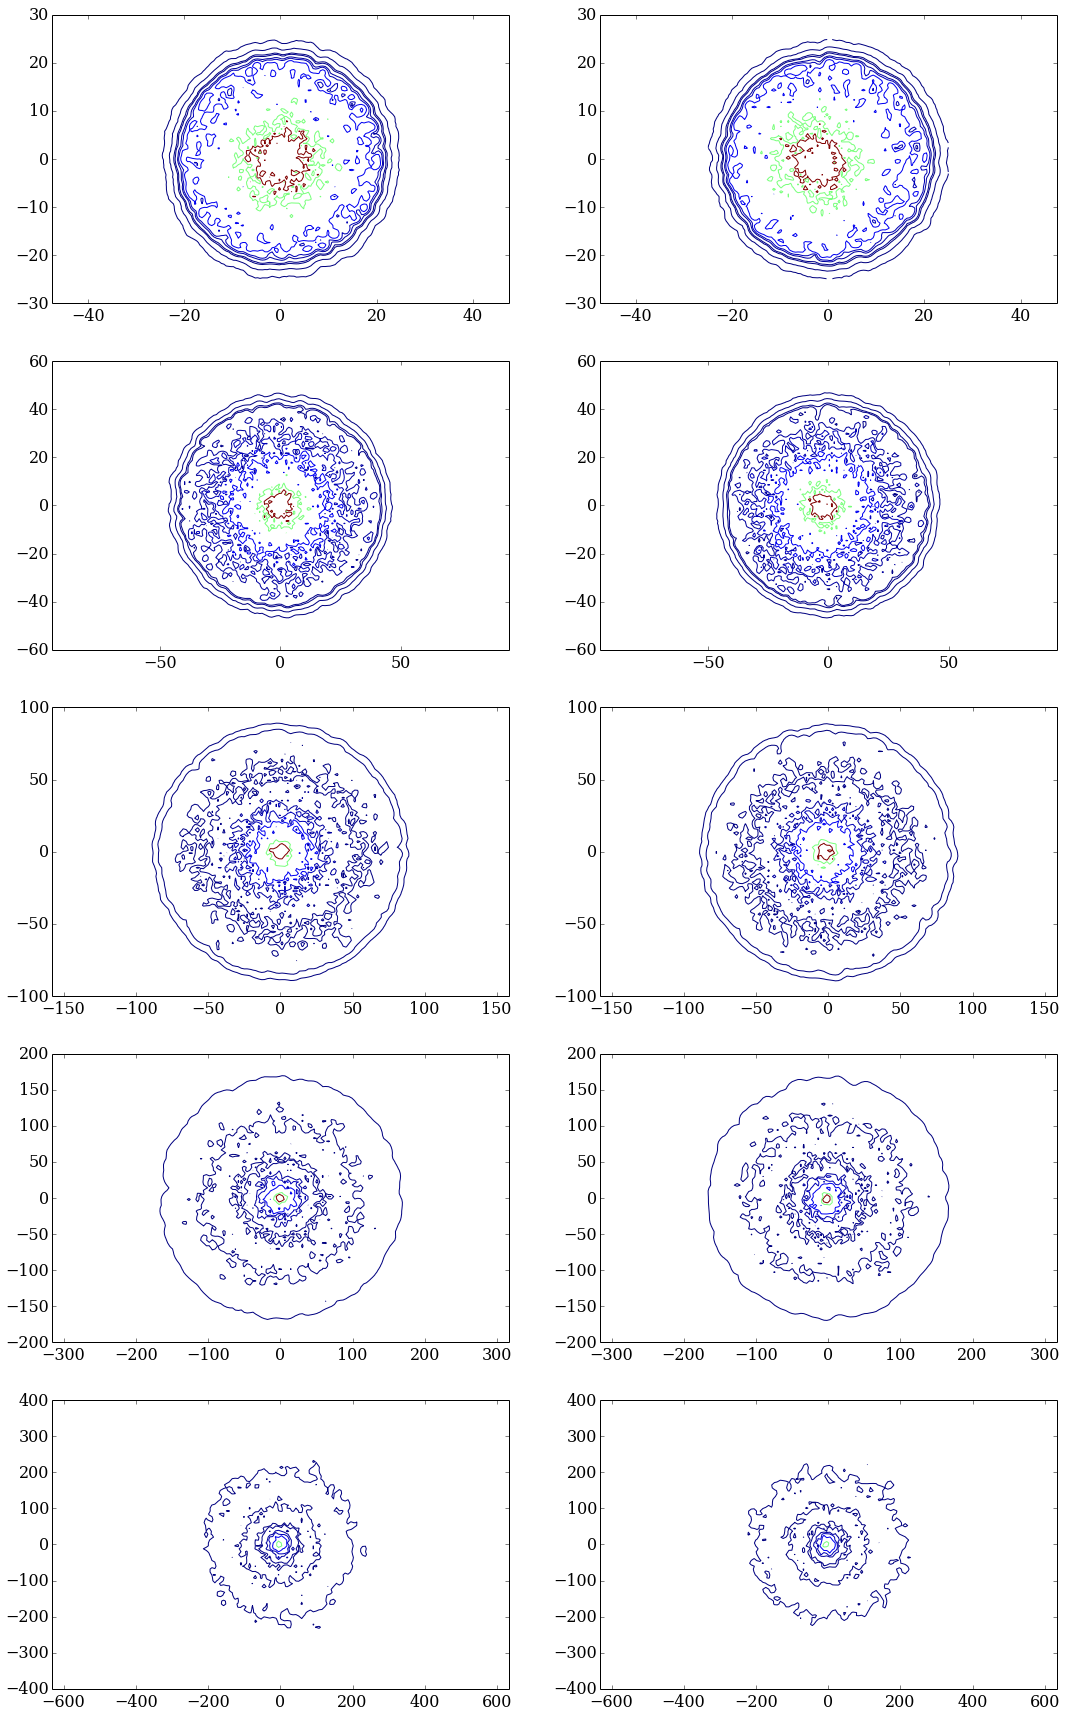

In [27]:
figure(figsize=(18,30))

subplot(5, 2, 1)
contour(mw_i_sy1, mw_i_sz1, rho_i_mw_1, levels=levels)
axis('equal')

subplot(5, 2, 2)
contour(mw_f_sy1, mw_f_sz1, rho_f_mw_1, levels=levels)
axis('equal')

subplot(5, 2, 3)
contour(mw_i_sy2, mw_i_sz2, rho_i_mw_2, levels=levels)
axis('equal')

subplot(5, 2, 4)
contour(mw_f_sy2, mw_f_sz2, rho_f_mw_2, levels=levels)
axis('equal')

subplot(5, 2, 5)
contour(mw_i_sy3, mw_i_sz3, rho_i_mw_3, levels=levels)
axis('equal')

subplot(5, 2, 6)
contour(mw_f_sy3, mw_f_sz3, rho_f_mw_3, levels=levels)
axis('equal')

subplot(5, 2, 7)
contour(mw_i_sy4, mw_i_sz4, rho_i_mw_4, levels=levels)
axis('equal')

subplot(5, 2, 8)
contour(mw_f_sy4, mw_f_sz4, rho_f_mw_4, levels=levels)
axis('equal')

subplot(5, 2, 9)
contour(mw_i_sy5, mw_i_sz5, rho_i_mw_5, levels=levels)
axis('equal')

subplot(5, 2, 10)
contour(mw_f_sy5, mw_f_sz5, rho_f_mw_5, levels=levels)
axis('equal')

savefig('MWdens_contours.png', bbox_inches='tight')